In [1]:
"""=============================================================================
Minh họa phương pháp SVD:
       a) Ma trận vuông
       b) Ma trận hình chữ nhật (m > n)
       c) Ma trận hình chữ nhật (m < n)  
============================================================================="""

import numpy as np

from numpy import array
from scipy.linalg import svd

## Các ma trận thử nghiệm
ma_tran_vuong = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
ma_tran_hcn1  = array([[1, 2], [3, 4], [5, 6]])
ma_tran_hcn2  = array([[3, 1, 1], [-1, 3, 1]])

A = ma_tran_hcn2
m = A.shape[0]  # rows
n = A.shape[1]  # cols
print('Ma trận A(', A.shape, ':\n', A)

## SVD
print('\n********** Phương pháp SVD **********')
U, eigenValues, VT = svd(A)

print('\nMa trận U  (left-singular vectors)' , U.shape, ':\n', U)

S = np.zeros(A.shape)
if (m < n):
    S[:m, :m] = np.diag(eigenValues)
else:
    S[:n, :n] = np.diag(eigenValues)
    
print('\nMa trận S  (single values)' , S.shape, ':\n', S)

print('\nMa trận VT (right-singular vectors)', VT.shape, ':\n', VT)

## Tái tạo ma trận ban đầu
print('\n* Tái tạo ma trận A (kiểm chứng lại phép phân rã):', A.shape, '\n', U @ S @ VT)


Ma trận A( (2, 3) :
 [[ 3  1  1]
 [-1  3  1]]

********** Phương pháp SVD **********

Ma trận U  (left-singular vectors) (2, 2) :
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Ma trận S  (single values) (2, 3) :
 [[3.46410162 0.         0.        ]
 [0.         3.16227766 0.        ]]

Ma trận VT (right-singular vectors) (3, 3) :
 [[ 4.08248290e-01  8.16496581e-01  4.08248290e-01]
 [-8.94427191e-01  4.47213595e-01  8.59279716e-16]
 [-1.82574186e-01 -3.65148372e-01  9.12870929e-01]]

* Tái tạo ma trận A (kiểm chứng lại phép phân rã): (2, 3) 
 [[ 3.  1.  1.]
 [-1.  3.  1.]]



*** a) Dataframe ex3.csv:
        post1  post2  post3  post4
word                             
ice        4      4      6      2
snow       6      1      0      5
tahoe      3      0      0      5
goal       0      6      5      1
puck       0      4      5      0 


*** b) Phân tích SVD:
- Ma trận U( 5 ,  5 ): 
 [[-0.62610079  0.01852561  0.6259093   0.23487748 -0.40090488]
 [-0.35134826 -0.67829097  0.0779915  -0.56006159  0.311005  ]
 [-0.21940528 -0.51980146 -0.50346468  0.6484906  -0.08747016]
 [-0.51965373  0.37026259 -0.59046979 -0.38005352 -0.31586445]
 [-0.40788911  0.36371724 -0.00485878  0.25726028  0.79695031]] 

- Eigenvalues: [13.3221948   9.2609512   2.41918664  1.37892883] 

- Ma trận VT( 4 ,  4 ): 
 [[-0.39563365 -0.57086917 -0.6301003  -0.34721178]
 [-0.59983555  0.33174302  0.4082791  -0.60286986]
 [ 0.60400142 -0.40535325  0.32193174 -0.60599586]
 [-0.34475152 -0.63225288  0.57675103  0.38569539]] 


*** c) NEW dataframe (using only the first two components):
     

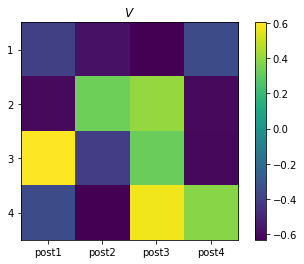

In [9]:
"""=============================================================================
Ex3: SVD
    Câu 1: 
        a) Cho tập tin ex3.csv. Đọc tập tin vào dataframe
        b) Phân tích SVD: U, s, VT từ dataframe
        c) Tạo dataframe mới từ U, s, VT, nhận xét và rút gọn thành phần, nếu có thể
        d) Tìm error nếu có rút gọn thành phần 
============================================================================="""
import numpy  as np
import pandas as pd

## a) Đọc tập tin ex3.csv vào dataframe
folder = 'Data/Bai 2/'
df     = pd.read_csv('../Data/B2/ex3.csv', index_col = 0)
print('\n*** a) Dataframe ex3.csv:\n', df, '\n')

## b) Phân tích SVD: U, s, VT
print('\n*** b) Phân tích SVD:')
U, s, VT = np.linalg.svd(df)

print('- Ma trận U(', U.shape[1], ', ', U.shape[0], '): \n', U, '\n')
print('- Eigenvalues:', s, '\n')
print('- Ma trận VT(', VT.shape[1], ', ', VT.shape[0], '): \n', VT, '\n')

## c) Tạo dataframe mới từ U, s, VT
col_headers = ['post1', 'post2', 'post3', 'post4']
words = ['ice', 'snow', 'tahoe', 'goal', 'puck']
#new_df = pd.DataFrame(VT, columns = col_headers)
A_approx = np.matrix(U[:, :2]) * np.diag(s[:2]) * np.matrix(VT[:2, :])

print('\n*** c) NEW dataframe (using only the first two components):')
#print(new_df)
print(pd.DataFrame(A_approx, index = words, columns = col_headers))

## d) Tìm error
print("\n*** d) Error from actual value:")
print(df - A_approx)

## e) Hiển thị
import matplotlib.pyplot as plt

plt.imshow(VT, interpolation = 'none')
plt.xticks(range(len(col_headers)))
plt.yticks(range(len(words)))
plt.ylim([len(words)-1.5, -.5])
ax = plt.gca()
ax.set_xticklabels(col_headers)
ax.set_yticklabels(range(1, len(words) + 1))
plt.title("$V$")
plt.colorbar()

In [11]:
"""=============================================================================
Ex3: SVD
    Câu 2: 
        a) Cho tập tin iris.csv, đọc dữ liệu ra dataframe và chỉ lấy 4 cột đầu
        b) Phân tích SVD: U, s, VT từ dataframe
        c) Tạo dataframe mới từ U, s, VT, nhận xét và rút gọn thành phần, nếu có thể
        d) Tìm error nếu có rút gọn thành phần 
        e) Tái cấu trúc dataframe theo U, s, VT (giữ nguyên tất cả các thành phần)
============================================================================="""
import numpy as np
import pandas as pd

## a) Đọc tập tin iris vào dataframe
folder = 'Data/Bai 2/'
iris   = pd.read_csv('../Data/B2/iris.csv')
print('\n*** a) Dataframe iris.csv:\n', iris.head())

X = iris[['sepal_length','sepal_width','petal_length','petal_width']]
print('\n       - 4 cột đầu tiên:\n', X.head())

## b) Phân tích SVD: U, s, VT
print('\n*** b) Phân tích SVD:')
U, s, VT = np.linalg.svd(X)

print('    - Ma trận U(', U.shape[1], ', ', U.shape[0], '): \n', U, '\n')
print('    - Eigenvalues:', s, '\n')
print('    - Ma trận VT(', VT.shape[1], ', ', VT.shape[0], '): \n', VT, '\n')

## c) Tạo dataframe mới từ U, s, VT
X1 = np.matrix(U[:, :2]) * np.diag(s[:2]) * np.matrix(VT[:2, :])

print('\n*** c) NEW dataframe (using only the first two components):')
print('    - X1.shape():', X1.shape)
Xnew = pd.DataFrame(X1, index = X.index, columns = X.columns)
print(Xnew.head())

## d) Tìm error
print('\n*** d) Error from actual value:')
print((X - X1).head())

## e) Tái tạo ma trận
Sigma = np.zeros_like(X)
Sigma[:X.shape[1], :X.shape[1]] = np.diag(s)
print(Sigma.shape)

X_c = U.dot(Sigma.dot(VT))
print(X_c[0:5])

X_c_new = pd.DataFrame(X_c, columns = X.columns)
print(X_c_new.head())




*** a) Dataframe iris.csv:
    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

       - 4 cột đầu tiên:
    sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

*** b) Phân tích SVD:
    - Ma trận U( 150 ,  150 ): 
 [[-6.16171172e-02  1.29969428e-01 -5.58364155e-05 ... -9.34637342e-02
  -9.60224157e-02 -8.09922905e-02]
 [-5.80722977e-02  1.11371452e-01  6.84386629e-02 ...  3.667553